## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID" )
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = combined_data.groupby(["Drug Regimen"])

summary_mean = grouped_df['Tumor Volume (mm3)'].mean()
summary_median = grouped_df['Tumor Volume (mm3)'].median()
summary_var = grouped_df['Tumor Volume (mm3)'].var()
summary_std = grouped_df['Tumor Volume (mm3)'].std()
summary_sem = grouped_df['Tumor Volume (mm3)'].sem()


#change names in the data frame 
summary_stats_gp = pd.DataFrame({'mean tumor volume':summary_mean,
                                 'median tumor value': summary_median,
                                 'tumor volume variance': summary_var,
                                 'tumor volume variance': summary_std,
                                 'tumor volume std. err': summary_sem})

summary_stats_gp

,mean tumor volume,median tumor value,tumor volume variance,tumor volume std. err
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [6]:
mean_weight_by_drug = grouped_df['Weight (g)'].mean()
mean_weight_by_drug

Drug Regimen
Capomulin    19.965217
Ceftamin     27.398876
Infubinol    27.196629
Ketapril     27.861702
Naftisol     27.166667
Placebo      27.928177
Propriva     27.043478
Ramicane     19.679825
Stelasyn     27.856354
Zoniferol    27.692308
Name: Weight (g), dtype: float64

In [7]:
summary_df= combined_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

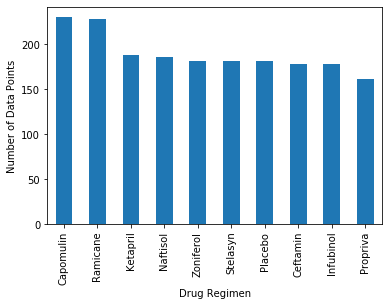

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count = combined_data['Drug Regimen'].value_counts()

count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

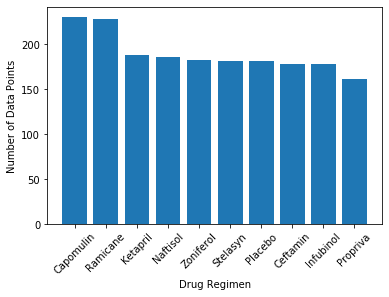

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count = combined_data['Drug Regimen'].value_counts()

plt.bar(count.index.values, count.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 45)
plt.show()

## Pie plots

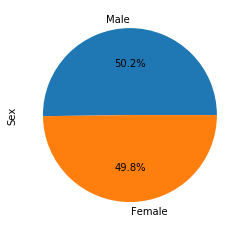

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

count = mouse_metadata.Sex.value_counts()

#creating the pie chart and formating it using pandas
count.plot(kind= "pie",autopct='%1.1f%%')

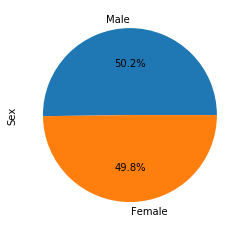

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

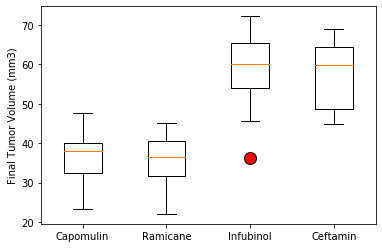

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

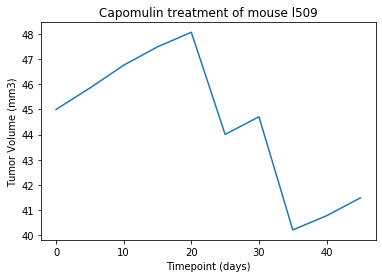

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

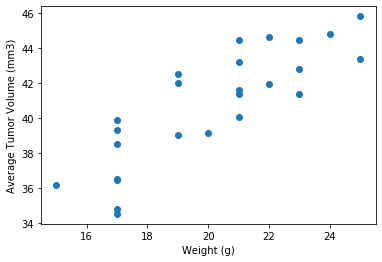

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

The correlation between mouse weight and the average tumor volume is 0.84


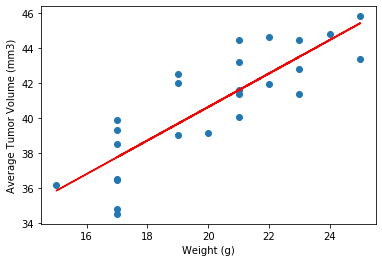

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen